# EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# загрузка датасета
import kagglehub

path = kagglehub.dataset_download("antonkozyriev/game-recommendations-on-steam")

print("Путь:", path)

Путь: C:\Users\User\.cache\kagglehub\datasets\antonkozyriev\game-recommendations-on-steam\versions\28


In [4]:
os.listdir(path) # папки с данными

['games.csv', 'games_metadata.json', 'recommendations.csv', 'users.csv']

## Датасет с играми

In [5]:
data_games = pd.read_csv(path + '\\games.csv') # 
data_games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [6]:
data_games.shape

(50872, 13)

Всего 50872 игр

In [7]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [8]:
data_games.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,5.087200e+04,50872.000000,5.087200e+04,50872.000000,50872.000000,50872.000000
mean,1.055224e+06,77.052033,1.824425e+03,8.620325,8.726788,5.592212
std,6.103249e+05,18.253592,4.007352e+04,11.514164,11.507021,18.606679
min,1.000000e+01,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,5.287375e+05,67.000000,1.900000e+01,0.990000,0.990000,0.000000
50%,9.860850e+05,81.000000,4.900000e+01,4.990000,4.990000,0.000000
75%,1.524895e+06,91.000000,2.060000e+02,10.990000,11.990000,0.000000
max,2.599300e+06,100.000000,7.494460e+06,299.990000,299.990000,90.000000


25% игр продаются менее чем за 1 доллар, 50% менее чем за 5 долларов.

У игр большое отклонение, 50% игр имеют менее 50 отзывов, 75% игр менее 200.


In [9]:
data_games.isna().sum() # проверка на пропуски

app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

Пропусков не обнаружено

In [10]:
duplicates = data_games.duplicated() # проверка на дубликаты
duplicates.sum()

0

Дубликатов не обнаружено

In [44]:
free_games = len(data_games[data_games['price_original'] == 0]) # Кол-во бесплатных игр
free_games

10090

In [45]:
paid_games = len(data_games[data_games['price_original'] != 0]) # Кол-во платных игр
paid_games

40782

In [68]:
win_games = len(data_games[data_games['win'] == True]) # Кол-во игр на windows
mac_games = len(data_games[data_games['mac'] == True]) # Кол-во игр на mac
linux_games = len(data_games[data_games['linux'] == True]) # Кол-во игр на linux
steam_deck_games = len(data_games[data_games['steam_deck'] == True]) # Кол-во игр на steam deck

all_platform_games = len(data_games[(data_games['linux'] == True) # Кол-во игр на всех платформах
                         & (data_games['win'] == True) 
                         & (data_games['mac'] == True)
                         & (data_games['steam_deck'] == True)])

zero_platform_games = len(data_games[(data_games['linux'] == False) # Кол-во игр не поддерживающих ни одну плафторму
                         & (data_games['win'] == False) 
                         & (data_games['mac'] == False)
                         & (data_games['steam_deck'] == False)])

steam_deck_exclusive_games = len(data_games[(data_games['linux'] == False) # Кол-во игр, которые есть исключительно на steam deck
                         & (data_games['win'] == False) 
                         & (data_games['mac'] == False)
                         & (data_games['steam_deck'] == True)])

print(f"Кол-во игр на windows: {win_games}\nКол-во игр на mac: {mac_games}\nКол-во игр на linux: {linux_games}\n"
f"Кол-во игр на steam deck: {steam_deck_games}")

print(f"\nКол-во игр поддерживающих все платформы: {all_platform_games}")

print(f"\nКол-во игр не поддерживающих ни одну плафторму: {zero_platform_games}")

print(f"\nКол-во игр эксклюзивных для steam deck: {steam_deck_exclusive_games}")

Кол-во игр на windows: 50076
Кол-во игр на mac: 13018
Кол-во игр на linux: 9041
Кол-во игр на steam deck: 50870

Кол-во игр поддерживающих все платформы: 7653

Кол-во игр не поддерживающих ни одну плафторму: 0

Кол-во игр эксклюзивных для steam deck: 792


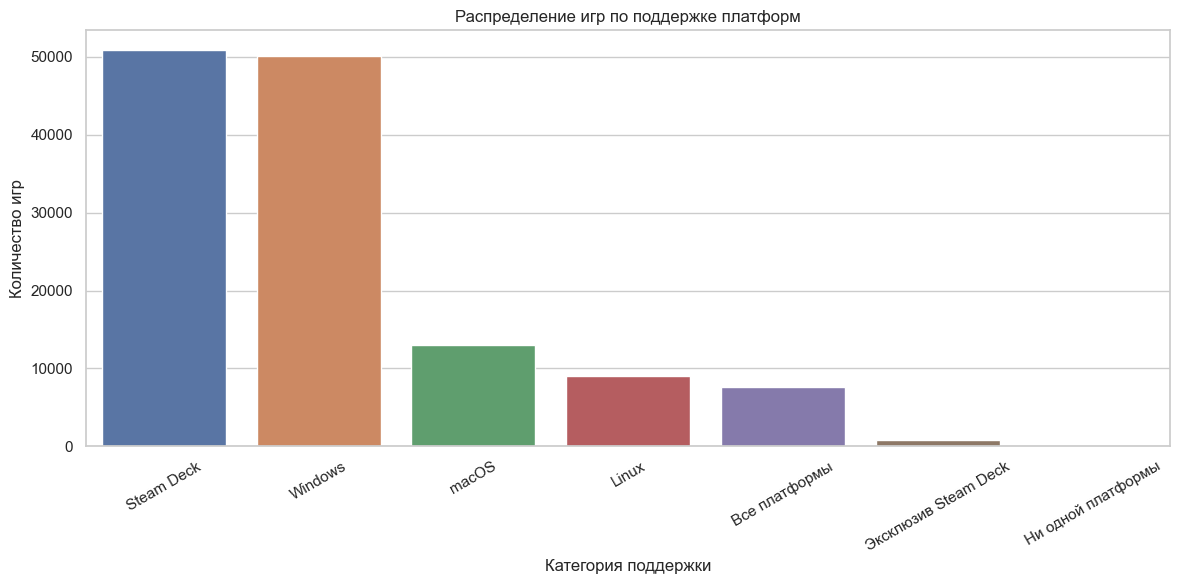

In [72]:
stats = pd.DataFrame({
    "Категория": [
        "Windows",
        "macOS",
        "Linux",
        "Steam Deck",
        "Все платформы",
        "Ни одной платформы",
        "Эксклюзив Steam Deck"
    ],
    "Количество игр": [
        win_games,
        mac_games,
        linux_games,
        steam_deck_games,
        all_platform_games,
        zero_platform_games,
        steam_deck_exclusive_games
    ]
})

stats = stats.sort_values("Количество игр", ascending=False)

plt.figure(figsize=(12, 6))

sns.barplot(
    data=stats,
    x="Категория",
    y="Количество игр",
    hue = 'Категория',
    dodge=False
)

plt.title("Распределение игр по поддержке платформ")
plt.xlabel("Категория поддержки")
plt.ylabel("Количество игр")
plt.xticks(rotation=30)
plt.tight_layout()

plt.show()

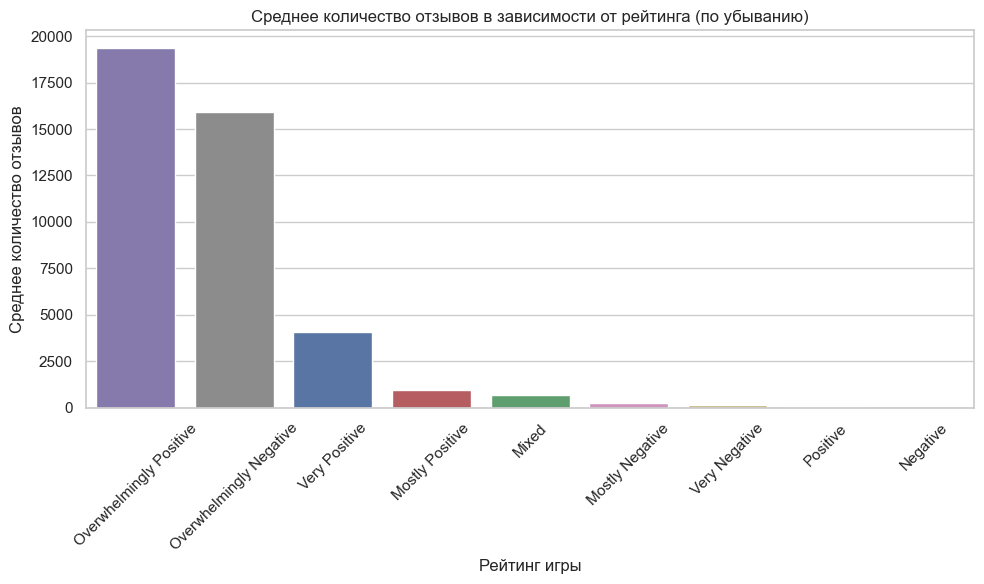

In [56]:
sns.color_palette("Spectral", as_cmap=True)

rating_order = (
    data_games
    .groupby("rating", as_index=False)["user_reviews"]
    .mean()
    .sort_values("user_reviews", ascending=False)["rating"]
)

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(
    data=data_games,
    x="rating",
    y="user_reviews",
    estimator=np.mean,
    errorbar=None,
    order=rating_order,
    hue='rating',
    ax=ax
)

ax.set_xlabel("Рейтинг игры")
ax.set_ylabel("Среднее количество отзывов")
ax.set_title("Среднее количество отзывов в зависимости от рейтинга (по убыванию)")

ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()